# Explainability of speech classification model

This notebook demonstrates how to use the `Partition` explainer for a multiclass text classification scenario. Once the SHAP values are computed for a set of sentences we then visualize feature attributions towards individual classes. The text classifcation model we use is BERT fine-tuned on an emotion dataset to classify a sentence among six classes: joy, sadness, anger, fear, love and surprise.

In [60]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import pickle
import transformers
import datasets
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import shap
import seaborn  as sns

# Load dataset

In [ ]:
# Please fill this in
PATH_TO_SHAP_BAL = ""
PATH_TO_SHAP_IMBAL = ""
PATH_TO_SHAP_IMBAL_CW = ""

In [101]:
dataset = datasets.load_from_disk("../datasets/xnli_fr_en")
dataset = dataset["test_bal"]
data = pd.DataFrame(
    {
        "text": [
            dataset["premise"][i] + dataset["hypothesis"][i]
            for i in range(len(dataset["premise"]))
        ],
        "label": dataset["label"],
        "language": dataset["language"],
    }
)

shap_values_bal = pickle.load(open(PATH_TO_SHAP_BAL,"rb"))
shap_values_imbal = pickle.load(open(PATH_TO_SHAP_IMBAL,"rb"))
shap_values_imbal_cw = pickle.load(open(PATH_TO_SHAP_IMBAL_CW,"rb"))

In [102]:
df_shap_bal = pd.DataFrame(
    {
        "values": shap_values_bal.values,
        "base_values": list(shap_values_bal.base_values),
        "feature_names": shap_values_bal.feature_names,
    }
)

df_shap_imbal = pd.DataFrame(
    {
        "values": shap_values_imbal.values,
        "base_values": list(shap_values_imbal.base_values),
        "feature_names": shap_values_imbal.feature_names,
    }
)

df_shap_imbal_cw = pd.DataFrame(
    {
        "values": shap_values_imbal_cw.values,
        "base_values": list(shap_values_imbal_cw.base_values),
        "feature_names": shap_values_imbal_cw.feature_names,
    }
)

In [104]:
df_shap_bal["overall_shap_values"] = df_shap_bal.apply(lambda x : x["values"].sum(axis=0) +x["base_values"], axis=1)
df_shap_imbal["overall_shap_values"] = df_shap_imbal.apply(lambda x : x["values"].sum(axis=0) +x["base_values"], axis=1)
df_shap_imbal_cw["overall_shap_values"] = df_shap_imbal_cw.apply(lambda x : x["values"].sum(axis=0) +x["base_values"], axis=1)

In [ ]:
# THIS IS TO GET PREDICTIONS DISTRIBUTIONS
df_shap_bal_with_language = df_shap_imbal.copy()
df_shap_bal_with_language["language"] = data.reset_index()["language"]
df_shap_bal_with_language["predictions"] = df_shap_bal_with_language["overall_shap_values"].apply(lambda x: np.argmax(x))
LANGUAGE_GROUP = {"en": 0, "fr":1}
df_shap_bal_with_language["language_group"] = df_shap_bal_with_language["language"].apply(lambda x: LANGUAGE_GROUP[x])
# round to 1 decimal and multiply by 100
# then format by assing percentage sign and & in between to be latex reads
df_shap_bal_with_language.groupby("language_group")["predictions"].value_counts(normalize=True).apply(lambda x : round(x*100, 1)).apply(lambda x: str(x) + "\%").unstack().apply(lambda x: " & ".join(x), axis=1)


In [106]:
df_shap_all = pd.concat([
    df_shap_bal.add_suffix("_bal"),
    df_shap_imbal.add_suffix("_imbal"),
    df_shap_imbal_cw.add_suffix("_imbal_cw"),
],axis=1)

,values_bal,base_values_bal,feature_names_bal,overall_shap_values_bal,values_imbal,base_values_imbal,feature_names_imbal,overall_shap_values_imbal,values_imbal_cw,base_values_imbal_cw,feature_names_imbal_cw,overall_shap_values_imbal_cw
0,"[[-0.0054116301859418545, 0.001530889576921860...","[0.6522992849349976, 0.1775670200586319, 0.170...","[, Well, ,, I, wasn, ', t, even, thinking, abo...","[0.9563282132148743, 0.04021009430289266, 0.00...","[[-0.001181488080571095, 0.003865760751068592,...","[0.3349500000476837, 0.20344600081443787, 0.46...","[, Well, ,, I, wasn, ', t, even, thinking, abo...","[0.9420355558395387, 0.05207826197147372, 0.00...","[[-0.002072238460338364, 0.0004348204626391331...","[0.5786260366439819, 0.21944133937358856, 0.20...","[, Well, ,, I, wasn, ', t, even, thinking, abo...","[0.9586290121078491, 0.03599475324153906, 0.00..."
1,"[[6.678781711024699e-05, -0.002069358146211205...","[0.7487184405326843, 0.13793617486953735, 0.11...","[, And, I, thought, that, was, a, pri, vile, g...","[0.9173790812492371, 0.06053649261593817, 0.02...","[[0.0031807350369726685, -0.000737234465505734...","[0.38087254762649536, 0.24242480099201202, 0.3...","[, And, I, thought, that, was, a, pri, vile, g...","[0.4580541253089905, 0.18654920160770416, 0.35...","[[0.0039449346783970085, -0.002169288965108405...","[0.6898384690284729, 0.1591738760471344, 0.150...","[, And, I, thought, that, was, a, pri, vile, g...","[0.7984074354171753, 0.036642376333475044, 0.1..."
2,"[[-0.0010563298723556928, 0.00201930969229175,...","[0.6949138045310974, 0.15051303803920746, 0.15...","[, They, told, me, that, ,, u, h, ,, that, I, ...","[0.9936407208442688, 0.005057987757027038, 0.0...","[[-0.001234059690290855, 0.0023328067734837534...","[0.3644687831401825, 0.20382411777973175, 0.43...","[, They, told, me, that, ,, u, h, ,, that, I, ...","[0.9754073023796082, 0.011266328394412994, 0.0...","[[-0.0018988850759342315, 0.003448966164917995...","[0.5440792441368103, 0.23679867386817932, 0.21...","[, They, told, me, that, ,, u, h, ,, that, I, ...","[0.9858660697937012, 0.00877878163009882, 0.00..."
3,"[[-0.0003726854920387268, 0.000710050808265805...","[0.7572078108787537, 0.11781524866819382, 0.12...","[, There, ', s, so, much, you, could, talk, ab...","[0.5470761656761169, 0.24463909864425662, 0.20...","[[0.000145107158459723, -0.0016705291345715523...","[0.4145079553127289, 0.2031790167093277, 0.382...","[, There, ', s, so, much, you, could, talk, ab...","[0.16347463428974157, 0.219173863530159, 0.617...","[[0.0007889950647950172, -0.000328507740050554...","[0.5305027365684509, 0.26206979155540466, 0.20...","[, There, ', s, so, much, you, could, talk, ab...","[0.4191133379936218, 0.25638744235038763, 0.32..."
4,"[[-0.0035900507937185466, 0.002379133598878979...","[0.6115522384643555, 0.20913194119930267, 0.17...","[, That, was, the, primary, thing, we, wanted,...","[0.7013991475105285, 0.1465849578380586, 0.152...","[[-0.0029366700910031796, 0.002967406297102570...","[0.3025404214859009, 0.1963314414024353, 0.501...","[, That, was, the, primary, thing, we, wanted,...","[0.3868302106857299, 0.3203006386756899, 0.292...","[[-0.0028643574623856694, 0.001153736142441630...","[0.5714243054389954, 0.2204313427209854, 0.208...","[, That, was, the, primary, thing, we, wanted,...","[0.49933379888534546, 0.3800165057182313, 0.12..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6667,"[[-0.005310010203684215, 0.0023443520069122313...","[0.7163166999816895, 0.15962791442871094, 0.12...","[, Sur, l, ', opinion, du, pilote, et, le, fai...","[0.0005716614541596554, 0.004978403449058533, ...","[[0.0010264394443947821, -0.000922044008038938...","[0.3790171444416046, 0.2275175154209137, 0.393...","[, Sur, l, ', opinion, du, pilote, et, le, fai...","[0.0029170203488320112, 0.008568527176976148, ...","[[-0.003648127856431529, 0.000522439714986831,...","[0.6817517280578613, 0.1648663580417633, 0.153...","[, Sur, l, ', opinion, du, pilote, et, le, fai...","[0.0

In [148]:
df_shap_all["contribution_diff_per_token_imbal"] = df_shap_all.apply(
    lambda x: x["values_imbal"] - x["values_bal"]
    ,
    axis=1,
)

df_shap_all["contribution_diff_per_token_imbal_cw"] = df_shap_all.apply(
    lambda x: x["values_imbal_cw"] - x["values_bal"]
    ,
    axis=1,
)

threshold = 0.01

df_shap_contrib_imbal = df_shap_all.apply(
    lambda x: pd.Series(
        dict(
            [
                (
                    "contribution_to_diff_from_neutral",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal"],
                        mask=~(np.abs(x["values_bal"]) <= threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_positive",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal"],
                        mask=~(x["values_bal"] > threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_negative",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal"],
                        mask=~(x["values_bal"] < -threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_base_values",
                    x["base_values_imbal"] - x["base_values_bal"],
                ),
                ("overall_shap_values_bal", x["overall_shap_values_bal"]),
                ("overall_shap_values_imbal", x["overall_shap_values_imbal"]),
                ("overall_shap_values_imbal_cw", x["overall_shap_values_imbal_cw"]),
            ]
        )
    ),
    axis=1,
)
df_shap_contrib_imbal_cw = df_shap_all.apply(
    lambda x: pd.Series(
        dict(
            [
                (
                    "contribution_to_diff_from_neutral",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal_cw"],
                        mask=~(np.abs(x["values_bal"]) <= threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_positive",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal_cw"],
                        mask=~(x["values_bal"] > threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_negative",
                    np.ma.array(
                        x["contribution_diff_per_token_imbal_cw"],
                        mask=~(x["values_bal"] < -threshold),
                    ).sum(axis=0),
                ),
                (
                    "contribution_to_diff_from_base_values",
                    x["base_values_imbal_cw"] - x["base_values_bal"],
                ),
                ("overall_shap_values_bal", x["overall_shap_values_bal"]),
                ("overall_shap_values_imbal", x["overall_shap_values_imbal"]),
                ("overall_shap_values_imbal_cw", x["overall_shap_values_imbal_cw"]),
            ]
        )
    ),
    axis=1,
)

,contribution_to_diff_from_neutral,contribution_to_diff_from_positive,contribution_to_diff_from_negative,contribution_to_diff_from_base_values,overall_shap_values_bal,overall_shap_values_imbal,overall_shap_values_imbal_cw
0,"[0.20516127180065571, -0.08022712664484669, -0...","[0.035164902558123365, -0.014610882413884009, ...","[0.06273045315319904, 0.08082719597150573, -0....","[-0.31734928488731384, 0.02587898075580597, 0....","[0.9563282132148743, 0.04021009430289266, 0.00...","[0.9420355558395387, 0.05207826197147372, 0.00...","[0.9586290121078491, 0.03599475324153906, 0.00..."
1,"[0.06975990035854056, 0.027292568075602514, -0...","[-0.09558473903206714, -0.07008155044591563, 0...","[-0.06565422436053103, 0.06431306523960444, 0....","[-0.36784589290618896, 0.10448862612247467, 0....","[0.9173790812492371, 0.06053649261593817, 0.02...","[0.4580541253089905, 0.18654920160770416, 0.35...","[0.7984074354171753, 0.036642376333475044, 0.1..."
2,"[0.19679441474671916, -0.04213063517485612, -0...","[-0.026329872518267836, -0.13576309766393108, ...","[0.1417470606978029, 0.1307909937356488, -0.02...","[-0.3304450213909149, 0.05331107974052429, 0.2...","[0.9936407208442688, 0.005057987757027038, 0.0...","[0.9754073023796082, 0.011266328394412994, 0.0...","[0.9858660697937012, 0.00877878163009882, 0.00..."
3,"[-0.011588087779940298, 0.03354962459222105, -...","[-0.150752405508077, -0.1252069549324612, 0.14...","[0.12143881746766659, -0.019171672814991325, 0...","[-0.3426998555660248, 0.08536376804113388, 0.2...","[0.5470761656761169, 0.24463909864425662, 0.20...","[0.16347463428974157, 0.219173863530159, 0.617...","[0.4191133379936218, 0.25638744235038763, 0.32..."
4,"[0.12070413987800878, 0.03754772317396211, -0....","[-0.17135321213780638, 0.04811523482203483, -0...","[0.045091952413453595, 0.10085322263850166, -0...","[-0.3090118169784546, -0.01280049979686737, 0....","[0.7013991475105285, 0.1465849578380586, 0.152...","[0.3868302106857299, 0.3203006386756899, 0.292...","[0.49933379888534546, 0.3800165057182313, 0.12..."
...,...,...,...,...,...,...,...
6667,"[0.029603041057160013, 0.003338702402349245, -...","[--, -0.1768601753671343, -0.2809798133093864]","[0.31004187337759714, 0.1092219957005, 0.09666...","[-0.33729955554008484, 0.06788960099220276, 0....","[0.0005716614541596554, 0.004978403449058533, ...","[0.0029170203488320112, 0.008568527176976148, ...","[0.0008945987210609019, 0.003584072692319834, ..."
6668,"[0.14603493155300384, -0.11451493786642625, -0...","[--, -0.04880584430595099, -0.22968549757149648]","[0.20585125612706182, 0.0975162736576749, --]","[-0.345000684261322, 0.06422001123428345, 0.28...","[0.0019818004220724106, 0.013867203146219143, ...","[0.008867303840815965, 0.012282705865800575, 0...","[0.0019809307996181413, 0.008709523826837318, ..."
6669,"[0.06329870005937416, 0.09397802308260922, -0....","[-0.0008612097054350454, -0.05818604362300701,...","[0.27283941136801526, 0.06576782343022171, 0.0...","[-0.3307161033153534, 0.06528343260288239, 0.2...","[0.3202575445175169, 0.3241485357284546, 0.355...","[0.32481834292411804, 0.4909917712211609, 0.18...","[0.14570580422878254, 0.4900205433368683, 0.36..."
6670,"[0.1745532888225033, -0.10186092090466378, -0....","[--, --, -0.3486190949988937]","[0.27829536425371315, 0.051292686729220216, --]","[-0.38570454716682434, 0.1274600476026535, 0.2...","[0.0026052568573499135, 0.05226017162203797, 0...","[0.06974936276674276, 0.12915198504924774, 0.8...","[0.0048631285317242146, 0.041170634329318986, ..."


In [149]:
df_shap_contrib_imbal["language"] = data["language"].reset_index(drop=True)
df_shap_contrib_imbal_cw["language"] = data["language"].reset_index(drop=True)

df_shap_contrib_langavg_imbal = (df_shap_contrib_imbal.groupby("language")
    .apply(lambda df: df.apply(lambda x: np.ma.vstack(x).mean(axis=0), axis=0))
    .rename_axis(["language","label"])
    .reset_index())

df_shap_contrib_langavg_imbal_cw = (df_shap_contrib_imbal_cw.groupby("language")
    .apply(lambda df: df.apply(lambda x: np.ma.vstack(x).mean(axis=0), axis=0))
    .rename_axis(["language","label"])
    .reset_index())

(-0.5, 0.3)

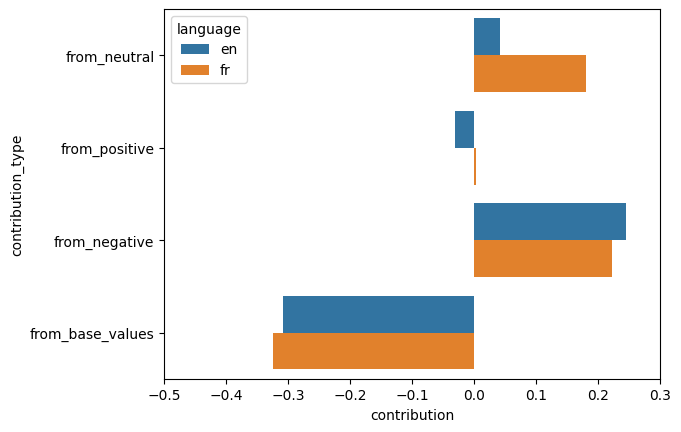

In [155]:
sns.barplot(
    data=(
        df_shap_contrib_langavg_imbal.query("label==0")
        .rename(
            columns={
                "contribution_to_diff_from_neutral": "from_neutral",
                "contribution_to_diff_from_positive": "from_positive",
                "contribution_to_diff_from_negative": "from_negative",
                "contribution_to_diff_from_base_values": "from_base_values",
            }
        )
        .melt(
            id_vars=["language", "label"],
            value_vars=[
                "from_neutral",
                "from_positive",
                "from_negative",
                "from_base_values",
            ],
            var_name="contribution_type",
            value_name="contribution",
        )
    ),
    x="contribution",
    y="contribution_type",
    hue="language",
    hue_order=["en", "de", "zh", "fr", "es", "ja"],
)

plt.xlim(-0.16, 0.16)

In [ ]:
sns.barplot(
    data=(
        df_shap_contrib_langavg_imbal_cw.query("label==0")
        .rename(
            columns={
                "contribution_to_diff_from_neutral": "from_neutral",
                "contribution_to_diff_from_positive": "from_positive",
                "contribution_to_diff_from_negative": "from_negative",
                "contribution_to_diff_from_base_values": "from_base_values",
            }
        )
        .melt(
            id_vars=["language", "label"],
            value_vars=[
                "from_neutral",
                "from_positive",
                "from_negative",
                "from_base_values",
            ],
            var_name="contribution_type",
            value_name="contribution",
        )
    ),
    x="contribution",
    y="contribution_type",
    hue="language",
    hue_order=["en", "de", "zh", "fr", "es", "ja"],
)

plt.xlim(-0.16, 0.16)